# Unit 2

In [26]:
# Define path for files

path = r'/Users/charlesrambo/Desktop/Bootcamp24/Images/'

## Linear Algebra

In [27]:
# Import module
import numpy as np

# Define matrices
C = np.array([[2, 1, 3, 4], 
              [-3, 1, 5, 1], 
              [5, -1, 11, 7], 
              [-1, 10, 2, 4]])

D = np.array([[100, -5, 2, 1], 
              [7, -2, 1, 1], 
              [-5, 1, 2, 3], 
              [20, 1, 4, 50]])

# Perform arithmetic 
result_a = 2 * C + D
result_b = C @ D.T

In [28]:
# Import module
import numpy as np
from scipy.linalg import null_space

# Define matrix
A = np.array([[-1, 0, 1], [5, 1, -5]])

# Calculate null space
null = null_space(A)

# Round results
null = np.round(null, 6)

# Note: any non-zero scalar multiple of result is correct
null

array([[0.707107],
       [0.      ],
       [0.707107]])

In [29]:
import numpy as np
from scipy.linalg import null_space

# Change of basis function
def change_matrix_basis(matrix, basis_new):
    """
    matrix: nxn matrix written in original basis
    basis_new: nxn matrix where column j represents 
        the j-th basis element written in terms of 
        the original basis
        
    return: matrix written in terms of the new basis
    """
    
    # Check to verify that basis_new is actually a basis
    if null_space(basis_new).shape[1] != 0:
        
        raise Exception('This is not a basis!')
    
    # Calculate matrix written in new basis
    matrix_new = np.linalg.inv(basis_new) @ matrix @ basis_new
    
    # Round since float accuracy makes numbers slightly off
    matrix_new = np.round(matrix_new, 6)
    
    return matrix_new

# Define matrix
matrix = np.array([[2, -4], [6, 2]])
basis_new = np.array([[1, 1], [1, -1]])

change_matrix_basis(matrix, basis_new)

array([[ 3.,  5.],
       [-5.,  1.]])

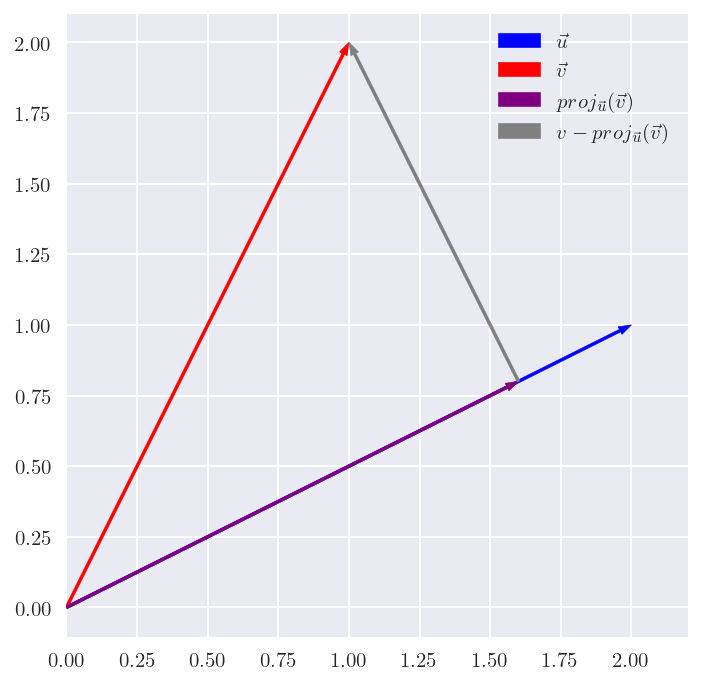

In [30]:
# Import modules
import numpy as np, matplotlib.pyplot as plt

# Use Seaborn style
plt.style.use('seaborn')

# Use LaTeX
plt.rcParams['text.usetex'] = True

# Define u and v
u, v = np.array([2, 1]), np.array([1, 2])

# Calculate projection; key step
proj = np.dot(u, v)/np.linalg.norm(u)**2 * u

# Calculate the part of v perpendicular to u
u_perp = v - proj

# Define origin
origin = np.array([0, 0])

# Plot figure
fig, ax = plt.subplots(1, 1, dpi = 150)

# Draw arrow for u
ax.arrow(*origin, *u, label = r'$\vec{u}$', 
         color = 'blue', width = 0.01, 
         length_includes_head = True)

# Draw arrow for v
ax.arrow(*origin, *v, label = r'$\vec{v}$', 
         color = 'red', width = 0.01, 
         length_includes_head = True)

# Draw arrow for projection
ax.arrow(*origin, *proj, label = r'$proj_{\vec{u}}(\vec{v})$', 
           color = 'purple', width = 0.01, 
         length_includes_head = True)

# Draw arrow for part of v perpendicular to u
# Place initial side at terminal side of projection
ax.arrow(*proj, *u_perp, label = r'$v - proj_{\vec{u}}(\vec{v})$', 
           color = 'gray', width = 0.01, 
         length_includes_head = True)

# Add a little horizontal space for legend
ax.set_xlim([0, np.max([u[0], v[0], proj[0], u_perp[0]]) + 0.2])

# Make aspect ratio equal
fig.gca().set_aspect('equal')

# Place legend at upper right
ax.legend(loc = 'upper right')

# Save the figure
plt.savefig(path + r'ex2-1.png')

# Show graph
plt.show()

In [53]:
import numpy as np

# Define u1 and u2
u1, u2 = np.array([1, 1, 0]), np.array([1, -1, 0])

# Define v
v = np.array([1, 2, 3])

# Calculate projection

# First, projection onto u1
proj = np.dot(u1, v)/np.linalg.norm(u1)**2 * u1 

# Second, add projection onto u2
proj += np.dot(u2, v)/np.linalg.norm(u2)**2 * u2

proj

array([1., 2., 0.])

In [54]:
# Set random seed
np.random.seed(0)

# Calculate minimal norm
min_norm = np.linalg.norm(v - proj)

# Define number of trials
trials = 100_000

# Initialize object to hold results
norm_vals = np.zeros(trials)

for i in range(trials):
    
    # Generate weights; use guassian distribution
    alpha = np.random.normal(size = 2)
    
    # Calculate u'
    u_prime = alpha[0] * u1 + alpha[1] * u2
    
    # Calculate and record norm
    norm_vals[i] = np.linalg.norm(v - u_prime)
    
print(f'The number of norms less than the norm of v - proj_U(v) is {np.sum(norm_vals < min_norm)}.')

The number of norms less than the norm of v - proj_U(v) is 0.


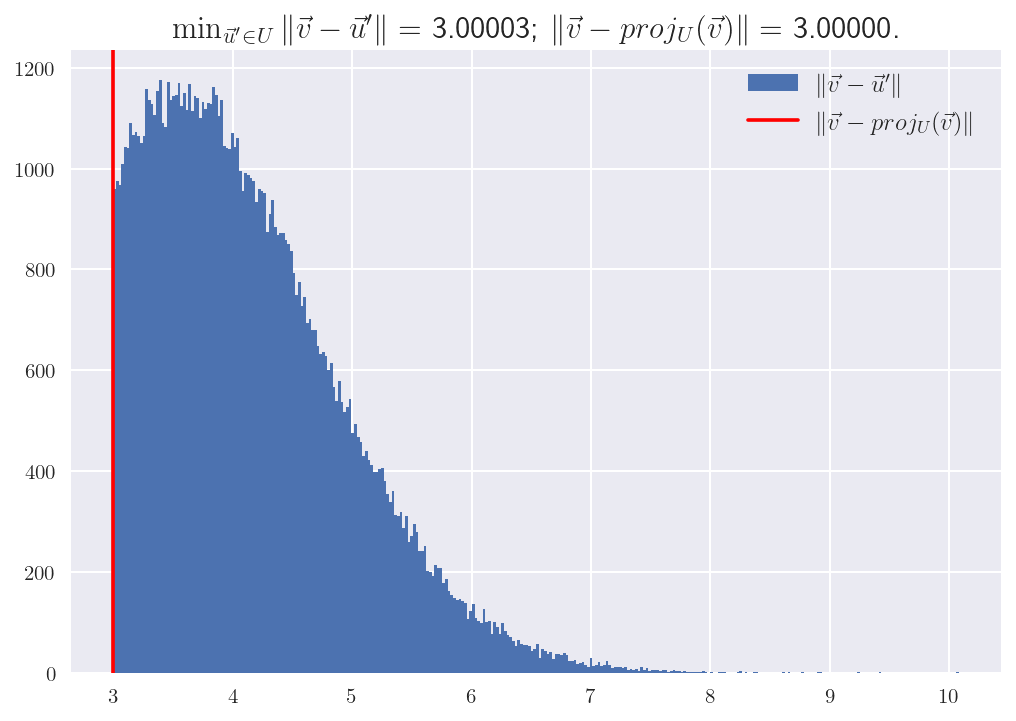

In [55]:
import matplotlib.pyplot as plt

# Use Seaborn style
plt.style.use('seaborn')

# Use LaTeX
plt.rcParams['text.usetex'] = True

# Plot figure
fig, ax = plt.subplots(1, 1, dpi = 150)

ax.hist(norm_vals, label = r"$\|\vec{v} - \vec{u}'\|$", bins = int(np.sqrt(trials)))

ax.axvline(min_norm, ymin = 0, ymax = 1, label = r'$\| \vec{v} - proj_U(\vec{v})\|$', 
           color = 'red')

ax.set_title(r"$\min_{\vec{u}'\in U} \| \vec{v} - \vec{u}'\| = $ " + f'{np.min(norm_vals):.5f};' +
             r' $\|\vec{v} - proj_{U}(\vec{v})\| = $ ' + f'{min_norm:.5f}.', fontsize = 15)

# Create a legend
ax.legend(fontsize = 12)

# Save the figure
plt.savefig(path + r'ex2-2.png')

plt.show()


In [ ]:
# Remove norm_vals from RAM since it's big
del norm_vals

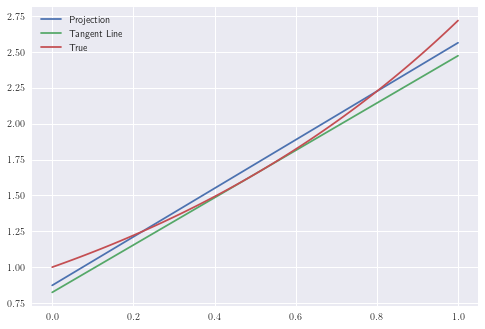

In [34]:
import numpy as np, matplotlib.pyplot as plt

# Use Seaborn style
plt.style.use('seaborn')

# Import numerical integrator
from scipy.integrate import quad

# Define inner product
inner = lambda f, g: quad(lambda x: f(x) * g(x), 0, 1)[0]

# Define basis elements
u1, u2 = lambda x: 1, lambda x: x - 1/2 

# Calculate inner products
a_proj, b_proj = inner(u1, np.exp)/inner(u1, u1), inner(u2, np.exp)/inner(u2, u2) 

# Define small value
h = 1e-5

# Calculate tangent line coeffs
a_tl, b_tl = np.exp(0.5), (np.exp(0.5 + h) - np.exp(0.5 - h))/(2 * h)

# Define functions 
proj = lambda x: a_proj * u1(x) + b_proj * u2(x)
tan_line = lambda x: a_tl * u1(x) + b_tl * u2(x)

# Get the x-values for plot
x_vals = np.linspace(0, 1, 100)

# Plot results
plt.plot(x_vals, [proj(x) for x in x_vals], label = 'Projection')
plt.plot(x_vals, [tan_line(x) for x in x_vals], label = 'Tangent Line')
plt.plot(x_vals, [np.exp(x) for x in x_vals], label = 'True')

# Create a legend
plt.legend()

# Save the figure
plt.savefig(path + r'ex2-3.png')

# Show plot
plt.show()

In [35]:
# Define norm
norm = lambda f: np.sqrt(inner(f, f))

# Let's calculate the norms
norm_proj, norm_tl = norm(lambda x: np.exp(x) - proj(x)), norm(lambda x: np.exp(x) - tan_line(x))

print(f'Using the projection approximation the norm is {norm_proj:.3f}.')
print(f'Using the tangent line approximation the norm is {norm_tl:.3f}.')

Using the projection approximation the norm is 0.063.
Using the tangent line approximation the norm is 0.094.


In [36]:
import numpy as np

# Define matrix 
A = np.array([[4, 0, 1], [-2, 1, 0], [-2, 0, 1]])

# Get the eigenvalues and eigenvectors
evals, evecs = np.linalg.eig(A)

# Loop through results
for i in range(len(evals)):
    
    print(f'eigenvalue: {evals[i]:.2f}; eigenvector: {evecs[:, i]}\n')


eigenvalue: 1.00; eigenvector: [0. 1. 0.]

eigenvalue: 3.00; eigenvector: [ 0.57735027 -0.57735027 -0.57735027]

eigenvalue: 2.00; eigenvector: [-0.33333333  0.66666667  0.66666667]



## Multivariable Calculus

In [56]:
import numpy as np
from scipy.optimize import minimize

# Define function
def distance(pt):
    
    # Get the x- and y-values
    x, y = pt[0], pt[1]
    
    # Define z 
    z = 4 - x - 2 * y
    
    return np.sqrt((x - 1)**2 + y**2 + (z + 2)**2)

# Get the result   
minimize(distance, x0 = [0, 0]) 

# Another option is to use the constraint x + 2y + z - 4 = 0 and optimize with three variables 

      fun: 2.0412414523198583
 hess_inv: array([[ 1.71207714, -0.67961111],
       [-0.67961111,  0.68098713]])
      jac: array([9.23871994e-07, 1.51991844e-06])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([1.83333386, 1.66666707])

In [57]:
# See https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.dblquad.html
from scipy.integrate import dblquad

# Define f; integrate y the x
f = lambda y, x: x * y**2

# Integrate; integrate 3rd to 4th input then 2nd to 3rd input
dblquad(f, 0, 1, 0, 1)[0]

0.16666666666666669

In [59]:
from scipy.integrate import dblquad

# Define f; integrate x then y
f = lambda x, y: x * y**2

# Integrate; integrate x = 0 to x = (2 - y)/2 then y = 0 to y = 2
dblquad(f, 0, 2, lambda y: 0, lambda y: (2 - y)/2)[0]

0.13333333333333333